[171009 - AMS] Original script written

This script illustrates the obervational selection bias in the P-D diagram distribution of radio galaxies shown in Fig. 7 of https://arxiv.org/abs/1704.00516.

-------

We want our plots to appear in line with the script rather than as separate windows:

In [1]:
%matplotlib inline

We'll need to import some libraries:

In [34]:
import numpy as np  # for array manipulation
import pylab as pl  # for plotting

Pick a range of sizes to test. Here I'm selecting evenly spaced sizes in log space from 100 to 10000, at a spacing of $10^{0.1}$:

In [35]:
logSize = np.arange(2.,4.,0.1)  # kpc

Set a redshift:

In [36]:
z = 0.01

Calculate angular distance at this redshift, assuming some cosmology:

In [37]:
from astropy.cosmology import WMAP9 as cosmo
D_A = cosmo.kpc_proper_per_arcmin(z)

Use this to convert our physical sizes to angular sizes on the sky:

In [38]:
AngSize = 10**(logSize)/D_A  # arcmin

Work out the area for each source using our simple 2 circle model (note that AngSize is an array so this will also be an array):

In [39]:
Area = 2.*(np.pi*(AngSize/4.)**2)  # arcmin^2

(20,)
[  2.54214098e+01   4.02902194e+01   6.38556945e+01   1.01204455e+02
   1.60398252e+02   2.54214098e+02   4.02902194e+02   6.38556945e+02
   1.01204455e+03   1.60398252e+03   2.54214098e+03   4.02902194e+03
   6.38556945e+03   1.01204455e+04   1.60398252e+04   2.54214098e+04
   4.02902194e+04   6.38556945e+04   1.01204455e+05   1.60398252e+05] arcmin2 / kpc2


Work out the luminosity distance at this redshift and convert from Mpc to metres:

In [40]:
mpc2m = 3.09e22 
D_L = cosmo.luminosity_distance(z)*mpc2m

Use the NVSS 5$\sigma$ threshold as our limiting point. $\sigma = 0.5$mJy/beam.

In [41]:
thresh = 2.5e-3  # Jy/beam

Work out how many sq arcminutes per beam (beam FWHM is 45 arcsec = 0.75 arcmin):

In [42]:
bm2amin = 1.13*np.pi*(0.75**2)
print bm2amin

1.99687483044


Work out the integrated flux density for this source:

In [48]:
F = (thresh/bm2amin)*Area  # Jy

Use the integrated flux density to work out the radio power:

In [49]:
Prad = 1e-26*F*4*np.pi*D_L**2   # W/Hz/m^2

Plot the output:

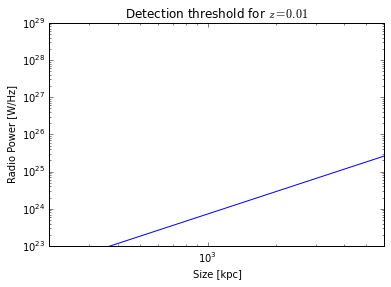

In [50]:
pl.subplot(111)
pl.plot(10**logSize,Prad)
pl.axis([200.,6000.,1e23,1e29])
pl.loglog()
pl.title(r'Detection threshold for $z=0.01$')
pl.ylabel(r'Radio Power [W/Hz]')
pl.xlabel(r'Size [kpc]')
pl.show()